## Intro

Abbiamo alimentato il PMT 2 a 600V e osservato, tramite l'oscilloscopio, i segnali uscenti da PMT 2 e quello amplificato.


Sul canale 2 (PMT2AMP), abbiamo analizzato una forma d'onda. Abbiamo notato un offset di 60mV dallo zero e un picco di 2460mV (preso rispetto al fondo del segnale, quindi 2520mV dallo zero). Abbiamo stimato il tempo caratteristico di scarica misurando il tempo che il segnale si riduce di un fattore $\frac{1}{e}$, pari a $\sim 60\,\mu s$.

Non si osservava pile-up col trigger a -20mV in quanto gli eventi sono rari (<10Hz)

Aprendo, invece, il collimatore, si vedono molti più eventi e un evidente pile-up. Questo accade perché più di un singolo evento viene integrato prima che si scarichi il condensatore. Il rate dell'oscilloscopio legge un rate di circa 100Hz (ordine di grandezza).

Abbiamo preso il segnale dal PMT2AMP, usando una "T" (impedenza ingresso oscilloscopio 1M$\Omega$) splittato per visualizzare sul canale 2 PMT2AMP e mandare il segnale dentro l'input del ORTEC435 shaper, settato su gain x1, input pos, output unipolar.

Si vedono dei picchi di intensità molto alta, circa di 12V (saturazione oscilloscopio 13.3V). 
La larghezza a metà altezza del segnale è dell'ordine di $2.6\,\mu s$

Il pile-up non si vede più, in quanto lo shaper deriva la scarica lenta, e la probabilità di avere due eventi entro $3\mu s$ è raro

-------

## B.10
### Picchi in base alla tensione

Abbiamo collegato l'uscita dallo shaper (tramite una T) all'input del CAEN N957, e abbiamo iniziato ad acquisire lo spettro del $^{60}Co$

|Tensione | picco 1 | picco 2|
| ---     | ---     | ---    |
| 500V    | 691     | 792    |
| 525V    | 1064    | 1204   |
| 550V    | 1595    | 1810   |
| 573V    | 2249    | 2583   |
| 603V    | 3452    | 3903   |
| 627V    | 4900    | 5512   |
| 653V    | 6663    | 7513   |


A 700V tutto veniva saturato e non si vedeva niente

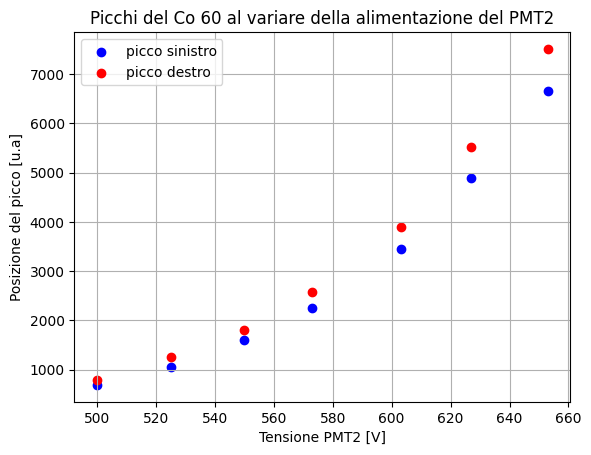

In [23]:
import numpy as np
import matplotlib.pyplot as plt

tensioni =[500, 525,  550,  573,  603,  627,  653]
picchi1 = [691, 1064, 1595, 2249, 3452, 4900, 6663]
picchi2 = [792, 1264, 1810, 2583, 3903, 5512, 7513]


plt.scatter(tensioni, picchi1, color="blue", label="picco sinistro")
plt.scatter(tensioni, picchi2, color="red", label="picco destro")
plt.xlabel("Tensione PMT2 [V]")
plt.ylabel("Posizione del picco [u.a]")
plt.title("Picchi del Co 60 al variare della alimentazione del PMT2")
plt.legend()
plt.grid()
plt.show()


# Relative gain calculation:


-------

## B.11
### Picchi in base al guadagno
tacchette 0,1,2,3,4,5,...,10
Noi sappiamo solo che tacca 0 corrisponde ad 1, e tacca 10 a 3. Il mannuale ci dice che il guadagno non è necessariamente lineare.

|Tacchetta | picco 1 | picco 2|
| ---      | ---     | ---    |
| 0        | 1595    | 1810   |
| 2.5      | 2091    | 2358   |
| 5        | 2842    | 3227   |
| 7.5      | 4325    | 4913   |
| 10       | 5203    | 5923   |



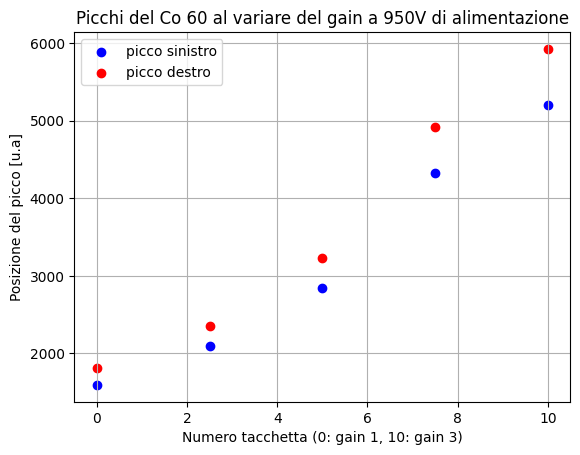

In [25]:
import numpy as np
import matplotlib.pyplot as plt

tacchetta= [0   , 2.5 , 5   , 7.5 , 10  ] #Tacchetta 0 corrisponde ad amplificazione 1, tacchetta 10 corrisponde ad amplificazione 10. 
picchi1  = [1595, 2091, 2842, 4325, 5203]
picchi2  = [1810, 2358, 3227, 4913, 5923]
tensione = 550 #V


plt.scatter(tacchetta, picchi1, color="blue", label="picco sinistro")
plt.scatter(tacchetta, picchi2, color="red", label="picco destro")
plt.xlabel("Numero tacchetta (0: gain 1, 10: gain 3)")
plt.ylabel("Posizione del picco [u.a]")
plt.title("Picchi del Co 60 al variare del gain a 950V di alimentazione")
plt.legend()
plt.grid()
plt.show()

-------

## B.13
### Selezione della tensione di lavoro per PMT2

Il decadimento del $^{60}Co$ produce due fotoni, di $1.17$MeV, $1.33$MeV. Vogliamo scegliere l'alimentazione del PMT2 per far si che un fotone di 1MeV porti un segnale "fast" di circa -20mV. Il nostro cobalto produce fotoni a $1.33$MeV, quindi vogliamo un segnale di $26.6$mV. 

Abbiamo usato la modalità "fast acquisition" per vedere i due picchi più probabili, e usando i cursori abbiamo misurato quello corrispondente al fotone di $1.33$MeV


Gain 1, tensione 600V, ampiezza pmt2 picco alto 16.5mV
Gain 1, tensione 657, 33mV
tensione 630, 25.3mV
575 12mV


A tutte queste misure attribuire $\pm 2.5$mV...


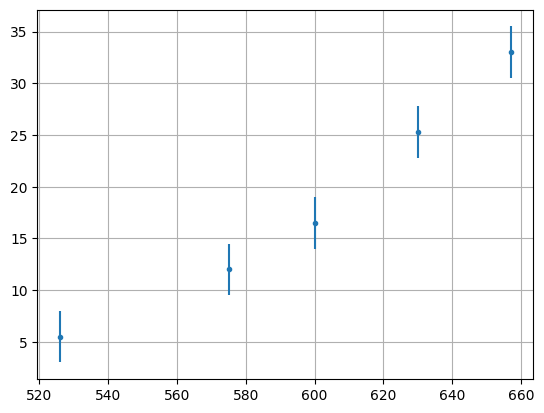

In [52]:
#Determine the relative variation of the gain of the PMT2 as a function of the PMT2 voltage
t= [526, 575, 600, 630, 657] #V
V = [5.5, 12,16.5, 25.3, 33] #mV

plt.errorbar(t,V, np.full(len(t), 2.5), fmt='.')
plt.grid()
plt.show()

-------

## B.12
### Guadagno del sistema

Alimentazione 630V
Giallo (fast, da pmt2) [mV]: 22.2 , 3.5  , 15 , 6.4  , 12.8, 21.3, 10.5

Rosso (shaped)          [V]: 6.120, 0.860, 4.1, 1.78 , 3.66, 5.92, 2.96



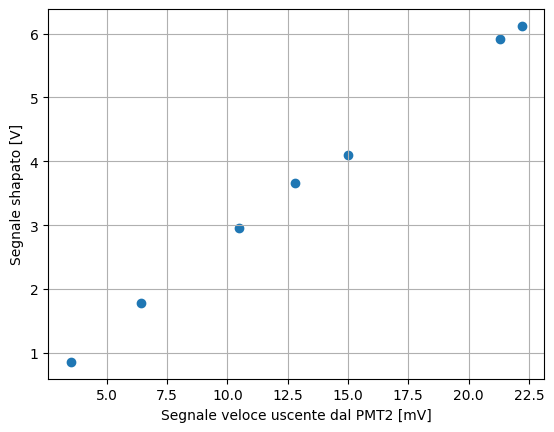

Rapporto angolare: 0.27

20mV di segnale fast corrispondono a 5.5 V


In [51]:

g = [22.2, 3.5  , 15  , 6.4, 12.8, 21.3, 10.5]
r = [6.120, 0.860, 4.1, 1.78, 3.66, 5.92, 2.96]

plt.scatter(g,r)
plt.xlabel("Segnale veloce uscente dal PMT2 [mV]")
plt.ylabel("Segnale shapato [V]")
plt.grid()
plt.show()

angolare_grezzo = (6100-0.86)/(22200-3.5)
print(f'Rapporto angolare: {round(angolare_grezzo,2)}\n')
print(f'20mV di segnale fast corrispondono a {round(angolare_grezzo*20,2)} V')

-------
# Sezione "C"
Abbiamo messo il PMT1 sopra quello 2.

## C.3
Alimentazione PMT1: $1912$V, Alimentazione PMT2: $631$V
Impostando il trigger del PMT1 a $-15$mV e quello del PMT 2 a $-100mV$ in modalità AND, abbiamo osservato

## C.5
V1: 1912
peak: 1.260V, 1.140

| Alimentazione PMT 1 | Misura 1 | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    |
| ---                 | ---      | ---   | ---   | ---   | ---   |---    | ---   | ---   | ---   | ---   |
| 1912                | 1.260    | 1.140 | 0.080 | 1.000 | 1.308 | 0.352 | 1.550 | 0.072 | 1.048 | 0.056 |
| 1800                | .....    | ..... | ..... | ..... | ..... | ..... | ..... | ..... | ..... | ..... |
| ....                | .....    | ..... | ..... | ..... | ..... | ..... | ..... | ..... | ..... | ..... |
| ....                | .....    | ..... | ..... | ..... | ..... | ..... | ..... | ..... | ..... | ..... |


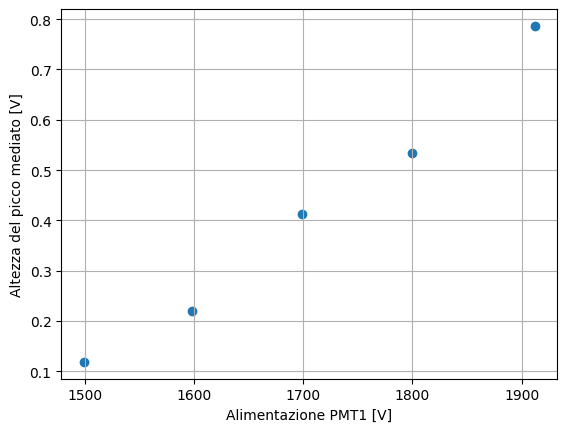

In [2]:
import numpy as np
import matplotlib.pyplot as plt

peaks1912 = [1.260, 1.140, 0.080, 1.000, 1.308, 0.352, 1.550, 0.072, 1.048, 0.056] #V
peaks1800 = [0.256, 0.928, 0.636, 0.176, 0.524, 0.748, 0.596, 0.192, 0.488, 0.804] #V
peaks1699 = [0.416, 0.670, 0.372, 0.540, 0.356, 0.398, 0.292, 0.388, 0.420, 0.276] #V
peaks1598 = [0.212, 0.254, 0.044, 0.309, 0.208, 0.177, 0.400, 0.177, 0.202, 0.214] #V
peaks1499 = [0.151, 0.158, 0.133, 0.116, 0.086, 0.049, 0.079, 0.163, 0.141, 0.112] #V

peaks = [np.mean(peaks1912), np.mean(peaks1800), np.mean(peaks1699), np.mean(peaks1598), np.mean(peaks1499)]
alimentazioni = [1912, 1800, 1699, 1598, 1499]

plt.scatter(alimentazioni, peaks)
plt.xlabel("Alimentazione PMT1 [V]")
plt.ylabel("Altezza del picco mediato [V]")
plt.grid()
plt.show()


-------

## C.6
Abbiamo connesso l'uscita del PMT1 ad un discriminatore con soglia minima ($-16.5$mV). La larghezza del segnale discriminato era circa 73ns.

Abbiamo portato l'uscita del discriminatore ad un contatore impostato a 100s. Naturalmente, abbiamo contato molti più singoli che coincidenze

| Alimentazione [V] | Conteggi in 10s|
| ---               | ---            |
| 1499              | 408            |
| 1599              | 957            |
| 1698              | 1424           |
| 1798              | 1867           |
| 1897              | 2793           |


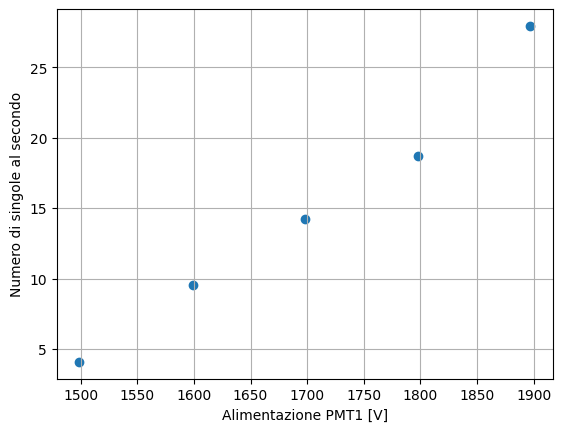

In [5]:
alimentazioni = [1499, 1599, 1698, 1798, 1897]
conteggi_al_s = np.array([408, 957, 1424, 1867, 2793])/100


plt.scatter(alimentazioni, conteggi_al_s)
plt.xlabel("Alimentazione PMT1 [V]")
plt.ylabel("Numero di singole al secondo")
plt.grid()
plt.show()

-------
## C.7 

### Selezione punto di lavoro PMT1

Per determinare il punto di lavoro abbiamo assunto che i raggi cosmici perdono, in media $1\frac{1MeV}{cm}$ dentro il nostro scintillatore plastico (densità media $\sim 1\frac{1g}{cm}$) assumendo che i raggi cosmici si trovano in media al MIP (Minimum Ionization Point) e quindi ad energia pari a $1.5$MeV. Il nostro scintillatore è spesso $2$cm e quindi vengono depositati circa $3$MeV

Volendo impostare una soglia di $20$mV quando si riceve un segnale di $100$keV. Quindi per $3$MeV questo corrisponde ad un segnale di $600$mV, e quindi abbiamo utilizzato il grafico generato nel punto __C.5__ per interpolare una tensione di lavoro di $1830$V per il PMT1

-------

-------
# Sezione D: "Signal conditioning for the PMT2"
## D.2

Abbiamo connesso il PMT2 (alimentato a $632$V) al discriminatore (soglia $-16.5$mV e durata di $73$ns). Poi l'uscita del discriminatore è stato portato all'ingresso di un dual-timer, dove l'uscita del primo è stato dato in input al secondo. L'idea è di usare il discriminatore per far partire un timer lungo, e usare il secondo timer per produrre un segnale corto impulsivo. 

Il primo timer è stato impostato a $1.15\mu$s, ma spesso saltava tra quel valore e $1.4\mu$s (con probabilità di un terzo). Tuttavia risultava molo più lungo della durata di un segnale uscente dal PMT2
Il secondo timer (quello corto) invece si comportava in maniera molto più stabile, rimanendo fisso ad una durata di $44.20$ns.

L'uscita di questo timer corto verrà chiamato __PMT2 conditioned signal__.

-------

-------
# Sezione E: "Observation of the Compton Scattering"

Abbiamo messo il cristallo a $20$cm dal bersaglio ad un'angolo di 30 gradi. I voltaggi sono stati messi pari a $1832$V per il primo e $632$V per il secondo PMT. 

Utilizzando dei cavi di lunghezza apposita ($6+6$ns in and out) e il modulo delay abbiamo ritardato il segnale del discriminatore (posto a $-20$mV di soglia) di $68$ns per allinearlo con il segnale condizionato del PMT2.

Abbiamo contato le coincidenze tra questi due segnali, conteggiando $309$ coincidenze in 100 secondi ($\sim 3$ conteggi al secondo, molto minore di $\sim 19$ conteggi al secondo di accidentali con una configurazione simile.

Abbiamo poi preso il segnale di coincidenza e allungato tramite un'altra unità di _timing_, allungandolo di $4\mu$s in maniera di inviluppare totalmente il massimo del picco shapato prodotto da _PMT2-AMP_. In questa maniera, abbiamo un segnale di _gate_ che possiamo mandare all'ADC multicanale, che gli serve ad acquisire solo i massimi in un tempo specificato. 



-------

-------
# Sezione F "Calibrazione"
Ricordiamo che il punto di lavoro del PMT1 è $627$V. 

Abbiamo posto una sorgente di $Cs-137$ a pochi (10-ina) cm dal cristallo e abbiamo acquisito senza gate, trigger, o coincidenze il suo spettrro, ai fini di calibrare il nostro sistema. Il cesio produce un fotone a 661keV

Lo stronzio andava in saturazione in quanto produceva fotoni a più di 1.7MeV, che satura il nostro sheper. 

-------

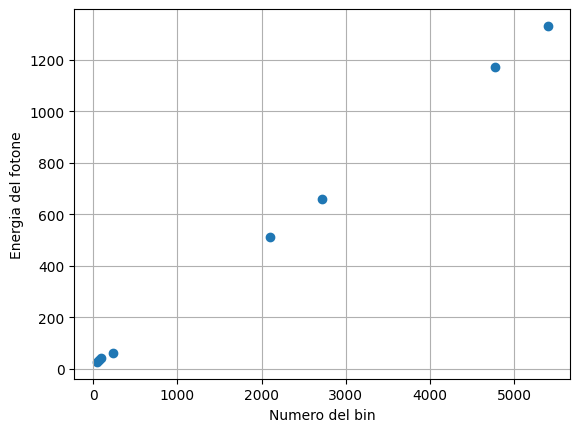

In [8]:
import numpy as np
import matplotlib.pyplot as plt

       #  Cs137,Am241,Am241,Am241,Am241,Na22 
binn   = [2720, 240 ,  98  , 71  ,  45  , 2100, 5398, 4769]
energy = [661 , 59.5,  43.4, 33.1,  26.3, 511 , 1332, 1173] #keV 

plt.scatter(binn, energy)
plt.xlabel("Numero del bin")
plt.ylabel("Energia del fotone")
plt.grid()
plt.show()


-------
# Sezione G "Planning"

Per stimare il flusso di fotoni che incidono sullo scintillatore plastico lo abbiamo alimentato a $627$V e posto davanti alla sorgente. Abbiamo contato discriminanto a $-20$V, e contato $225823$ conteggi in $100$s

Alle stesse condizioni di lavoro ma non davanti alla sorgente, si contano $1072$ conteggi in singola.

Quindi il flusso di fotoni è circa $224\frac{\gamma}{s}$, NO, FALSO. 

Stessa cosa ma con quello cristallino $1027355$ conteggi in 100sec (5cm di distanza dal foro)
Questo ci piace di più come stima in quanto il cristallo ha efficienza maggiore...?

Diametro del PMT2 ($5.8$cm)

lunghezza del collimatore $11$cm

d_ext 2 d_in 1cm

Questa ci dà una apertura angolare di $9.5$ gradi (semi-apertura $4.75$ gradi)


-------